
# <h1 align="center"> Milestone 2: Data Analysis I </h1>
<h3 align="center"> IST 5520: Data Science and Machine Learning with Python </h3>
<h3 align="center"> By: Group 4 </h3>

<h1 align="left"> # PROBLEM STATEMENT </h1>

The actual problem started in the city of Boston.Being one of the largest city in the world it is difficult to manage the crime activites for the patroling team. Also that the city is know for many crime activities, gang wars and large homeless population.
Some parts of the city are extremly dangerous.  The project aims to improve the public saftey in the city.By using machine learning techniques a build model will predict the future crime reports by taking the previous data.The data is trained in the model is been taken from the sources of BPD which is written by hand and there are some inacuracies with the data. The location, scheduling, and routines of police officers can be made more effective with the help of predictive analysis, which will improve patrolling in the Boston area. The following are some refrences where they talk about the seriousness of crime controling in Boston.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

from lightgbm import LGBMRegressor


In [3]:
data_2022=pd.read_csv('2022.csv',on_bad_lines='skip')
data_2021=pd.read_csv('2021.csv',on_bad_lines='skip')
data_2020=pd.read_csv('2020.csv',on_bad_lines='skip')
data_2019=pd.read_csv('2019.csv',on_bad_lines='skip')
data_2018=pd.read_csv('2018.csv',on_bad_lines='skip')

as we are having multiple datasets that is we have datasets from the year 2018 to 2022 the first task in the problem statement is to take merge the datasets by taking the attributes in consideration and bringing them to one 

In [4]:
data_2022

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           S87066666          3301                 NaN   
1           225520077          3115                 NaN   
2           222934485          3831                 NaN   
3           222924960          3301                 NaN   
4           222674933          3503                 NaN   
...               ...           ...                 ...   
61006       122004001          3115                 NaN   
61007       111077848          3115                 NaN   
61008        22031068          3114                 NaN   
61009       149210376          3110                 NaN   
61010       122207734          3831                 NaN   

                           OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  \
0                               VERBAL DISPUTE       B2            300   
1                           INVESTIGATE PERSON      D14            786   
2        M/V - LEAVING SCENE - PROPERTY DAMAGE       B2            319   
3                               VERBAL DISPUTE      C11            355   
4      MISSING PERSON - NOT REPORTED - LOCATED      C11            352   
...                                        ...      ...            ...   
61006                       INVESTIGATE PERSON      E13            912   
61007                       INVESTIGATE PERSON       E5            691   
61008                     INVESTIGATE PROPERTY      C11            249   
61009                  SERVICE TO OTHER AGENCY       B2                  
61010    M/V - LEAVING SCENE - PROPERTY DAMAGE       B3            465   

       SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0             0  2022-04-07 19:30:00  2022      4    Thursday    19       NaN   
1             0  2022-02-02 00:00:00  2022      2   Wednesday     0       NaN   
2             0  2022-05-14 20:50:00  2022      5    Saturday    20       NaN   
3             0  2022-04-09 16:30:00  2022      4    Saturday    16       NaN   
4             0  2022-09-28 00:00:00  2022      9   Wednesday     0       NaN   
...         ...                  ...   ...    ...         ...   ...       ...   
61006         0  2022-01-19 09:30:00  2022      1   Wednesday     9       NaN   
61007         0  2022-10-09 00:00:00  2022     10      Sunday     0       NaN   
61008         0  2022-05-02 08:00:00  2022      5      Monday     8       NaN   
61009         0  2022-01-02 00:00:00  2022      1      Sunday     0       NaN   
61010         0  2022-02-01 18:00:00  2022      2     Tuesday    18       NaN   

                                                  STREET        Lat  \
0                                         THORNTON PLACE   0.000000   
1                                          WASHINGTON ST  42.343081   
2                                          BLUE HILL AVE  42.308038   
3                                              GIBSON ST  42.297555   
4                                           LEROY STREET   0.000000   
...                                                  ...        ...   
61006                                           HEATH ST  42.325131   
61007                                          CENTRE ST  42.287094   
61008                                          SAXTON ST  42.313591   
61009  WASHINGTON ST & ROXBURY ST\nBOSTON  MA 02119\n...  42.329600   
61010                                   BLUE HILL AVENUE   0.000000   

            Long                                 Location  
0       0.000000                                   (0, 0)  
1     -71.141723  (42.34308127134165, -71.14172267328729)  
2     -71.083592  (42.30803768051951, -71.08359213073199)  
3     -71.059709  (42.29755532959655, -71.05970910242573)  
4       0.000000                                   (0, 0)  
...          ...                                      ...  
61006 -71.099408  (42.32513050637361, -71.09940814578592)  
61007 -71.148221  (42.28709355259107, -71.14822128377165)  
61008 -71.054324  (42.31359091105722, -71.

In [5]:
data1 = pd.concat([data_2022, data_2021], axis = 0)

In [5]:
data1

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           S87066666          3301                 NaN   
1           225520077          3115                 NaN   
2           222934485          3831                 NaN   
3           222924960          3301                 NaN   
4           222674933          3503                 NaN   
...               ...           ...                 ...   
71716       121005808          1102                 NaN   
71717       121000816          3304                 NaN   
71718       120221042          3006                 NaN   
71719        10637224          3125                 NaN   
71720        23844463          3115                 NaN   

                                     OFFENSE_DESCRIPTION DISTRICT  \
0                                         VERBAL DISPUTE       B2   
1                                     INVESTIGATE PERSON      D14   
2                  M/V - LEAVING SCENE - PROPERTY DAMAGE       B2   
3                                         VERBAL DISPUTE      C11   
4                MISSING PERSON - NOT REPORTED - LOCATED      C11   
...                                                  ...      ...   
71716                    FRAUD - FALSE PRETENSE / SCHEME       B3   
71717                        NOISY PARTY/RADIO-NO ARREST       E5   
71718                      SICK/INJURED/MEDICAL - PERSON       E5   
71719  WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...       D4   
71720                                 INVESTIGATE PERSON       C6   

      REPORTING_AREA  SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
0                300         0  2022-04-07 19:30:00  2022      4    Thursday   
1                786         0  2022-02-02 00:00:00  2022      2   Wednesday   
2                319         0  2022-05-14 20:50:00  2022      5    Saturday   
3                355         0  2022-04-09 16:30:00  2022      4    Saturday   
4                352         0  2022-09-28 00:00:00  2022      9   Wednesday   
...              ...       ...                  ...   ...    ...         ...   
71716            289         0  2021-01-19 12:00:00  2021      1     Tuesday   
71717            675         0  2021-01-04 00:00:00  2021      1      Monday   
71718            680         0  2021-04-02 10:45:00  2021      4      Friday   
71719            270         0  2021-01-26 18:54:00  2021      1     Tuesday   
71720                        0  2021-10-16 01:16:00  2021     10    Saturday   

       HOUR  UCR_PART                                            STREET  \
0        19       NaN                                    THORNTON PLACE   
1         0       NaN                                     WASHINGTON ST   
2        20       NaN                                     BLUE HILL AVE   
3        16       NaN                                         GIBSON ST   
4         0       NaN                                      LEROY STREET   
...     ...       ...                                               ...   
71716    12       NaN                                      CLARKWOOD ST   
71717     0       NaN                                  BRADFIELD AVENUE   
71718    10       NaN                                     WASHINGTON ST   
71719    18       NaN                                    NORTHAMPTON ST   
71720     1       NaN  G ST & E 8TH ST\nBOSTON  MA 02127\nUNITED STATES   

             Lat       Long                                  Location  
0       0.000000   0.000000                                    (0, 0)  
1      42.343081 -71.141723   (42.34308127134165, -71.14172267328729)  
2      42.308038 -71.083592   (42.30803768051951, -71.08359213073199)  
3      42.297555 -71.059709   (42.29755532959655, -71.05970910242573)  
4       0.000000   0.000000                                    (0, 0)  
...          ...        ...                                       ...  
71716  42.333679 -71.091878   (42.33367921810846, -71.09187754618458)  
71717   0.000000   0.000000   

In [6]:
data2 = pd.concat([data1, data_2020], axis = 0)

In [7]:
data2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           S87066666          3301                 NaN   
1           225520077          3115                 NaN   
2           222934485          3831                 NaN   
3           222924960          3301                 NaN   
4           222674933          3503                 NaN   
...               ...           ...                 ...   
70889        20063425          3114                 NaN   
70890        20062356          1107                 NaN   
70891        20046400          1501                 NaN   
70892        20038446          1501                 NaN   
70893        20030892           540                 NaN   

                                     OFFENSE_DESCRIPTION DISTRICT  \
0                                         VERBAL DISPUTE       B2   
1                                     INVESTIGATE PERSON      D14   
2                  M/V - LEAVING SCENE - PROPERTY DAMAGE       B2   
3                                         VERBAL DISPUTE      C11   
4                MISSING PERSON - NOT REPORTED - LOCATED      C11   
...                                                  ...      ...   
70889                               INVESTIGATE PROPERTY       A7   
70890                              FRAUD - IMPERSONATION      E18   
70891  WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...       B2   
70892  WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...       B2   
70893                              BURGLARY - COMMERICAL      C11   

      REPORTING_AREA  SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
0                300         0  2022-04-07 19:30:00  2022      4    Thursday   
1                786         0  2022-02-02 00:00:00  2022      2   Wednesday   
2                319         0  2022-05-14 20:50:00  2022      5    Saturday   
3                355         0  2022-04-09 16:30:00  2022      4    Saturday   
4                352         0  2022-09-28 00:00:00  2022      9   Wednesday   
...              ...       ...                  ...   ...    ...         ...   
70889             21         0  2020-09-01 00:00:00  2020      9     Tuesday   
70890            520         0  2020-08-28 18:39:00  2020      8      Friday   
70891            330         0  2020-07-02 01:38:00  2020      7    Thursday   
70892            300         0  2020-06-03 01:15:00  2020      6   Wednesday   
70893            380         0  2020-05-03 00:00:00  2020      5      Sunday   

       HOUR  UCR_PART          STREET        Lat       Long  \
0        19       NaN  THORNTON PLACE   0.000000   0.000000   
1         0       NaN   WASHINGTON ST  42.343081 -71.141723   
2        20       NaN   BLUE HILL AVE  42.308038 -71.083592   
3        16       NaN       GIBSON ST  42.297555 -71.059709   
4         0       NaN    LEROY STREET   0.000000   0.000000   
...     ...       ...             ...        ...        ...   
70889     0       NaN        PARIS ST  42.374427 -71.035279   
70890    18       NaN    RIVERSIDE SQ  42.256216 -71.124019   
70891     1       NaN     PASADENA RD  42.305761 -71.083772   
70892     1       NaN   WASHINGTON ST  42.323808 -71.089150   
70893     0       NaN   GALLIVAN BLVD  42.283700 -71.047761   

                                      Location  
0                                       (0, 0)  
1      (42.34308127134165, -71.14172267328729)  
2      (42.30803768051951, -71.08359213073199)  
3      (42.29755532959655, -71.05970910242573)  
4                                       (0, 0)  
...                                        ...  
70889    (42.3744269722053, -71.0352787630199)  
70890    (42.2562159204022, -71.1240194732902)  
70891    (42.3057609263196, -71.0837715727385)  
70892    (42.3238077563779, -71.0891502345332)  
70893    (42.2837003080534, -71.0477614298657)  

[203626 rows x 17 columns]

In [8]:
data2

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           S87066666          3301                 NaN   
1           225520077          3115                 NaN   
2           222934485          3831                 NaN   
3           222924960          3301                 NaN   
4           222674933          3503                 NaN   
...               ...           ...                 ...   
70889        20063425          3114                 NaN   
70890        20062356          1107                 NaN   
70891        20046400          1501                 NaN   
70892        20038446          1501                 NaN   
70893        20030892           540                 NaN   

                                     OFFENSE_DESCRIPTION DISTRICT  \
0                                         VERBAL DISPUTE       B2   
1                                     INVESTIGATE PERSON      D14   
2                  M/V - LEAVING SCENE - PROPERTY DAMAGE       B2   
3                                         VERBAL DISPUTE      C11   
4                MISSING PERSON - NOT REPORTED - LOCATED      C11   
...                                                  ...      ...   
70889                               INVESTIGATE PROPERTY       A7   
70890                              FRAUD - IMPERSONATION      E18   
70891  WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...       B2   
70892  WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...       B2   
70893                              BURGLARY - COMMERICAL      C11   

      REPORTING_AREA  SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
0                300         0  2022-04-07 19:30:00  2022      4    Thursday   
1                786         0  2022-02-02 00:00:00  2022      2   Wednesday   
2                319         0  2022-05-14 20:50:00  2022      5    Saturday   
3                355         0  2022-04-09 16:30:00  2022      4    Saturday   
4                352         0  2022-09-28 00:00:00  2022      9   Wednesday   
...              ...       ...                  ...   ...    ...         ...   
70889             21         0  2020-09-01 00:00:00  2020      9     Tuesday   
70890            520         0  2020-08-28 18:39:00  2020      8      Friday   
70891            330         0  2020-07-02 01:38:00  2020      7    Thursday   
70892            300         0  2020-06-03 01:15:00  2020      6   Wednesday   
70893            380         0  2020-05-03 00:00:00  2020      5      Sunday   

       HOUR  UCR_PART          STREET        Lat       Long  \
0        19       NaN  THORNTON PLACE   0.000000   0.000000   
1         0       NaN   WASHINGTON ST  42.343081 -71.141723   
2        20       NaN   BLUE HILL AVE  42.308038 -71.083592   
3        16       NaN       GIBSON ST  42.297555 -71.059709   
4         0       NaN    LEROY STREET   0.000000   0.000000   
...     ...       ...             ...        ...        ...   
70889     0       NaN        PARIS ST  42.374427 -71.035279   
70890    18       NaN    RIVERSIDE SQ  42.256216 -71.124019   
70891     1       NaN     PASADENA RD  42.305761 -71.083772   
70892     1       NaN   WASHINGTON ST  42.323808 -71.089150   
70893     0       NaN   GALLIVAN BLVD  42.283700 -71.047761   

                                      Location  
0                                       (0, 0)  
1      (42.34308127134165, -71.14172267328729)  
2      (42.30803768051951, -71.08359213073199)  
3      (42.29755532959655, -71.05970910242573)  
4                                       (0, 0)  
...                                        ...  
70889    (42.3744269722053, -71.0352787630199)  
70890    (42.2562159204022, -71.1240194732902)  
70891    (42.3057609263196, -71.0837715727385)  
70892    (42.3238077563779, -71.0891502345332)  
70893    (42.2837003080534, -71.0477614298657)  

[203626 rows x 17 columns]

In [9]:
data3 = pd.concat([data2,data_2019], axis = 0)
data3

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           S87066666          3301                 NaN   
1           225520077          3115                 NaN   
2           222934485          3831                 NaN   
3           222924960          3301                 NaN   
4           222674933          3503                 NaN   
...               ...           ...                 ...   
87179       192078631           400                 NaN   
87180       192078608           800                 NaN   
87181       192078606          3300                 NaN   
87182       192078634          3300                 NaN   
87183       192078648          3100                 NaN   

                                     OFFENSE_DESCRIPTION DISTRICT  \
0                                         VERBAL DISPUTE       B2   
1                                     INVESTIGATE PERSON      D14   
2                  M/V - LEAVING SCENE - PROPERTY DAMAGE       B2   
3                                         VERBAL DISPUTE      C11   
4                MISSING PERSON - NOT REPORTED - LOCATED      C11   
...                                                  ...      ...   
87179  Migrated Report - Aggravated Assault/Aggravate...       A7   
87180        Migrated Report - Assault/Assault & Battery      E18   
87181                   Migrated Report - Other Part III       C6   
87182                   Migrated Report - Other Part III       B3   
87183             Migrated Report - Investigate Property       B3   

      REPORTING_AREA  SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
0                300         0  2022-04-07 19:30:00  2022      4    Thursday   
1                786         0  2022-02-02 00:00:00  2022      2   Wednesday   
2                319         0  2022-05-14 20:50:00  2022      5    Saturday   
3                355         0  2022-04-09 16:30:00  2022      4    Saturday   
4                352         0  2022-09-28 00:00:00  2022      9   Wednesday   
...              ...       ...                  ...   ...    ...         ...   
87179                        0  2019-09-29 01:30:00  2019      9      Sunday   
87180                        0  2019-09-29 01:35:00  2019      9      Sunday   
87181                        0  2019-09-29 02:21:00  2019      9      Sunday   
87182                        0  2019-09-29 04:27:00  2019      9      Sunday   
87183                        0  2019-09-29 06:39:00  2019      9      Sunday   

       HOUR  UCR_PART          STREET        Lat       Long  \
0        19       NaN  THORNTON PLACE   0.000000   0.000000   
1         0       NaN   WASHINGTON ST  42.343081 -71.141723   
2        20       NaN   BLUE HILL AVE  42.308038 -71.083592   
3        16       NaN       GIBSON ST  42.297555 -71.059709   
4         0       NaN    LEROY STREET   0.000000   0.000000   
...     ...       ...             ...        ...        ...   
87179     1       NaN   BENNINGTON ST  42.390271 -70.996769   
87180     1       NaN   CANTERBURY ST  42.278688 -71.117344   
87181     2       NaN      W BROADWAY  42.341287 -71.054679   
87182     4       NaN      FOTTLER RD  42.278922 -71.094995   
87183     6       NaN      WILMORE ST  42.277964 -71.092463   

                                      Location  
0                                       (0, 0)  
1      (42.34308127134165, -71.14172267328729)  
2      (42.30803768051951, -71.08359213073199)  
3      (42.29755532959655, -71.05970910242573)  
4                                       (0, 0)  
...                                        ...  
87179                                   (0, 0)  
87180                                   (0, 0)  
87181                                   (0, 0)  
87182                                   (0, 0)  
87183                                   (0, 0)  

[290810 rows x 17 columns]

In [10]:
dat = pd.concat([data3,data_2018], axis=0)
dat

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0           S87066666          3301                NaN   
1           225520077          3115                NaN   
2           222934485          3831                NaN   
3           222924960          3301                NaN   
4           222674933          3503                NaN   
...               ...           ...                ...   
98883   I070720870-00           802     Simple Assault   
98884   I070720870-00          3125    Warrant Arrests   
98885   I060168073-00          1864     Drug Violation   
98886   I060168073-00          1864     Drug Violation   
98887   I060168073-00          3125    Warrant Arrests   

                               OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  \
0                                   VERBAL DISPUTE       B2            300   
1                               INVESTIGATE PERSON      D14            786   
2            M/V - LEAVING SCENE - PROPERTY DAMAGE       B2            319   
3                                   VERBAL DISPUTE      C11            355   
4          MISSING PERSON - NOT REPORTED - LOCATED      C11            352   
...                                            ...      ...            ...   
98883                            ASSAULT & BATTERY       B2            318   
98884                               WARRANT ARREST       B2            318   
98885  DRUGS - POSS CLASS D - INTENT MFR DIST DISP      E13            912   
98886  DRUGS - POSS CLASS D - INTENT MFR DIST DISP      E13            912   
98887                               WARRANT ARREST      E13            912   

      SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0            0  2022-04-07 19:30:00  2022      4    Thursday    19   
1            0  2022-02-02 00:00:00  2022      2   Wednesday     0   
2            0  2022-05-14 20:50:00  2022      5    Saturday    20   
3            0  2022-04-09 16:30:00  2022      4    Saturday    16   
4            0  2022-09-28 00:00:00  2022      9   Wednesday     0   
...        ...                  ...   ...    ...         ...   ...   
98883      NaN  2018-12-13 00:00:00  2018     12    Thursday     0   
98884      NaN  2018-12-13 00:00:00  2018     12    Thursday     0   
98885      NaN  2018-01-27 14:01:00  2018      1    Saturday    14   
98886      NaN  2018-01-27 14:01:00  2018      1    Saturday    14   
98887      NaN  2018-01-27 14:01:00  2018      1    Saturday    14   

         UCR_PART          STREET        Lat       Long  \
0             NaN  THORNTON PLACE   0.000000   0.000000   
1             NaN   WASHINGTON ST  42.343081 -71.141723   
2             NaN   BLUE HILL AVE  42.308038 -71.083592   
3             NaN       GIBSON ST  42.297555 -71.059709   
4             NaN    LEROY STREET   0.000000   0.000000   
...           ...             ...        ...        ...   
98883    Part Two   BROOKLEDGE ST  42.309563 -71.089902   
98884  Part Three   BROOKLEDGE ST  42.309563 -71.089902   
98885    Part Two       CENTRE ST  42.322838 -71.100967   
98886    Part Two       CENTRE ST  42.322838 -71.100967   
98887  Part Three       CENTRE ST  42.322838 -71.100967   

                                      Location  
0                                       (0, 0)  
1      (42.34308127134165, -71.14172267328729)  
2      (42.30803768051951, -71.08359213073199)  
3      (42.29755532959655, -71.05970910242573)  
4                                       (0, 0)  
...                                        ...  
98883              (42.30956305, -71.08990197)  
98884              (42.30956305, -71.08990197)  
98885              (42.32283759, -71.10096723)  
98886              (42.32283759, -71.10096723)  
98887              (42.32283759, -71.10096723)  

[389698 rows x 17 columns]

Now the intresting part starts in the task that is we are going to find out which crime having more number of incidets

In [12]:
dat.OFFENSE_CODE_GROUP.value_counts().iloc[:10]

Motor Vehicle Accident Response    11647
Medical Assistance                  8257
Larceny                             8116
Other                               5600
Investigate Person                  5467
Simple Assault                      5262
Drug Violation                      4777
Verbal Disputes                     4423
Vandalism                           4252
Investigate Property                3756
Name: OFFENSE_CODE_GROUP, dtype: int64

In [13]:
pd.set_option("display.max_columns",None)
dat
crimes=[dat]
crimes=pd.concat(crimes)

In [14]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389698 entries, 0 to 98887
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      389698 non-null  object 
 1   OFFENSE_CODE         389698 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  389698 non-null  object 
 4   DISTRICT             386559 non-null  object 
 5   REPORTING_AREA       389698 non-null  object 
 6   SHOOTING             291212 non-null  object 
 7   OCCURRED_ON_DATE     389698 non-null  object 
 8   YEAR                 389698 non-null  int64  
 9   MONTH                389698 non-null  int64  
 10  DAY_OF_WEEK          389698 non-null  object 
 11  HOUR                 389698 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               387401 non-null  object 
 14  Lat                  383269 non-null  float64
 15  Long              

In [15]:
# Checking null values in the dataset
crimes.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     290810
OFFENSE_DESCRIPTION         0
DISTRICT                 3139
REPORTING_AREA              0
SHOOTING                98486
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               290830
STREET                   2297
Lat                      6429
Long                     6429
Location                    0
dtype: int64

In [16]:
crimes_new = crimes
crimes_new.drop(columns = ['OFFENSE_CODE_GROUP','DISTRICT','UCR_PART','Long','Lat'], inplace = True)

As analyzed from the null data we need to remove the redundency columns this will impact our prediction model with all unnessary data redundency and reduces the model performance 

In [17]:
crimes_new.dropna(axis = 0, inplace = True)
crimes_new.reset_index(drop = True, inplace = True)
crimes_new.head()

INCIDENT_NUMBER  OFFENSE_CODE                      OFFENSE_DESCRIPTION  \
0       S87066666          3301                           VERBAL DISPUTE   
1       225520077          3115                       INVESTIGATE PERSON   
2       222934485          3831    M/V - LEAVING SCENE - PROPERTY DAMAGE   
3       222924960          3301                           VERBAL DISPUTE   
4       222674933          3503  MISSING PERSON - NOT REPORTED - LOCATED   

  REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0            300        0  2022-04-07 19:30:00  2022      4    Thursday    19   
1            786        0  2022-02-02 00:00:00  2022      2   Wednesday     0   
2            319        0  2022-05-14 20:50:00  2022      5    Saturday    20   
3            355        0  2022-04-09 16:30:00  2022      4    Saturday    16   
4            352        0  2022-09-28 00:00:00  2022      9   Wednesday     0   

           STREET                                 Location  
0  THORNTON PLACE                                   (0, 0)  
1   WASHINGTON ST  (42.34308127134165, -71.14172267328729)  
2   BLUE HILL AVE  (42.30803768051951, -71.08359213073199)  
3       GIBSON ST  (42.29755532959655, -71.05970910242573)  
4    LEROY STREET                                   (0, 0)

In [18]:
#Checking for null values after cleansing
crimes_new.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
Location               0
dtype: int64

In [19]:
#Converting column names to upper case for better readability
crimes_new.columns = map(str.upper, crimes_new.columns) 

In [20]:
crimes_new.head()

INCIDENT_NUMBER  OFFENSE_CODE                      OFFENSE_DESCRIPTION  \
0       S87066666          3301                           VERBAL DISPUTE   
1       225520077          3115                       INVESTIGATE PERSON   
2       222934485          3831    M/V - LEAVING SCENE - PROPERTY DAMAGE   
3       222924960          3301                           VERBAL DISPUTE   
4       222674933          3503  MISSING PERSON - NOT REPORTED - LOCATED   

  REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0            300        0  2022-04-07 19:30:00  2022      4    Thursday    19   
1            786        0  2022-02-02 00:00:00  2022      2   Wednesday     0   
2            319        0  2022-05-14 20:50:00  2022      5    Saturday    20   
3            355        0  2022-04-09 16:30:00  2022      4    Saturday    16   
4            352        0  2022-09-28 00:00:00  2022      9   Wednesday     0   

           STREET                                 LOCATION  
0  THORNTON PLACE                                   (0, 0)  
1   WASHINGTON ST  (42.34308127134165, -71.14172267328729)  
2   BLUE HILL AVE  (42.30803768051951, -71.08359213073199)  
3       GIBSON ST  (42.29755532959655, -71.05970910242573)  
4    LEROY STREET                                   (0, 0)

In [21]:
#Saving the cleansed dataset into a new csv file to reduce computational power
crimes_new.describe()
crimes_new.to_csv('crimes_new.csv',index = False)

In [22]:
#Checking distribution of each feature
crimes_new.OFFENSE_DESCRIPTION.value_counts().iloc[:10]

INVESTIGATE PERSON                       24222
M/V - LEAVING SCENE - PROPERTY DAMAGE    16875
SICK ASSIST                              14659
INVESTIGATE PROPERTY                     13288
VANDALISM                                12600
TOWED MOTOR VEHICLE                      11559
SICK/INJURED/MEDICAL - PERSON            11530
ASSAULT - SIMPLE                          9040
LARCENY SHOPLIFTING                       8583
LARCENY THEFT FROM MV - NON-ACCESSORY     8413
Name: OFFENSE_DESCRIPTION, dtype: int64

<AxesSubplot:>

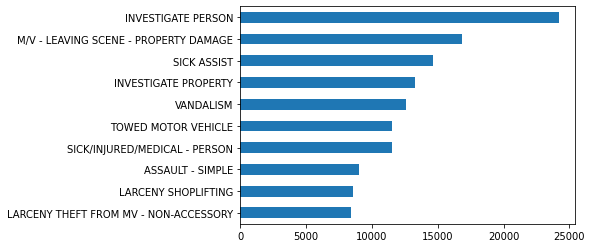

In [23]:
crimes_new.OFFENSE_DESCRIPTION.value_counts().iloc[:10].sort_values().plot(kind= 'barh')

From the above graph we can see that which type of crime is more number of times happeing that is investigate person by this we can say that the city of boston has more number of investigate person crimes from the years 2018 to 2022

In [24]:
#Analyze the specific crime 
MC = crimes_new[crimes_new.OFFENSE_DESCRIPTION.str.contains("INVESTIGATE PERSON")]
MC.head()

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_DESCRIPTION REPORTING_AREA SHOOTING  \
1        225520077          3115  INVESTIGATE PERSON            786        0   
23       222083469          3115  INVESTIGATE PERSON            613        0   
27       222083463          3115  INVESTIGATE PERSON                       0   
31       222083454          3115  INVESTIGATE PERSON            143        0   
39       222083439          3115  INVESTIGATE PERSON                       0   

       OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR         STREET  \
1   2022-02-02 00:00:00  2022      2   Wednesday     0  WASHINGTON ST   
23  2022-10-29 02:50:00  2022     10    Saturday     2   LONGWOOD AVE   
27  2022-10-29 01:40:00  2022     10    Saturday     1     ASHFORD CT   
31  2022-10-29 00:30:00  2022     10    Saturday     0    BOYLSTON ST   
39  2022-10-28 23:05:00  2022     10      Friday    23    HEMENWAY ST   

                                    LOCATION  
1    (42.34308127134165, -71.14172267328729)  
23  (42.339207366478725, -71.10778505937063)  
27   (42.35437653431005, -71.12611161673719)  
31  (42.348623815554966, -71.08277637086411)  
39   (42.34466385539056, -71.08971758331568)

We analyzed the dataset with respective to the specific crime that is taking place in which location. 

In [25]:
#Analyzing places 
MC.groupby('STREET').size().sort_values(ascending = False)  

STREET
WASHINGTON ST                                           1382
BLUE HILL AVE                                            669
CENTRE ST                                                558
GIBSON ST                                                441
HARRISON AVE                                             397
                                                        ... 
GLEN ST                                                    1
GLENCLIFF RD                                               1
GLENDOWER RD                                               1
GLENVILLE AVENUE                                           1
ZEIGLER ST & HARRISON AVE\nROXBURY  MA 02119\nUNITED       1
Length: 3677, dtype: int64

street washington has more number of crimes 
the investigative crime is more that to in the street of washington st 

<AxesSubplot:xlabel='MONTH'>

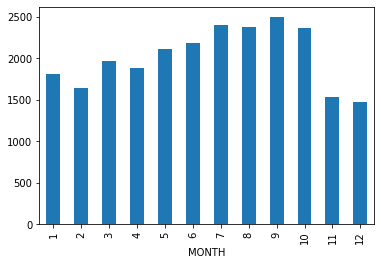

In [26]:
#analyzing the time 
MC.groupby('MONTH').size().plot(kind = 'bar')

the 9th month has the highest amount when compared the crimes with all the 12 months with around 2500 number of crimes pproxmetly 


<AxesSubplot:ylabel='None'>

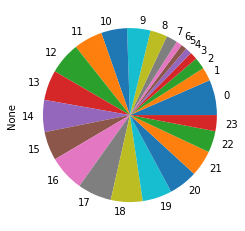

In [28]:
#number of incidents changes within a day
MC.groupby('HOUR').size().plot(kind= 'pie') 

Till now we brought all the raw data and bringing them to a structured data and deep driving into that as part of it we analyzed and plot the graph with respective to the crimes occured in boston city with respective to the day

<AxesSubplot:title={'center':'Correlation of features'}>

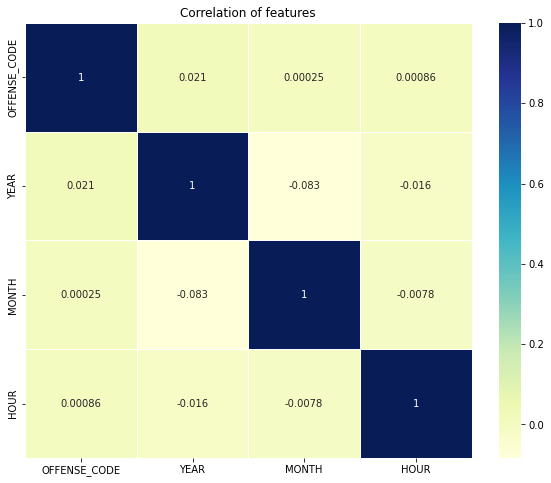

In [29]:
#crimes at 12:00 AM is more 
plt.figure(figsize = (10,8))
plt.title("Correlation of features")
sns.heatmap(crimes_new.corr(), annot = True, linewidth = 0.5, cmap = "YlGnBu")

Most of the variables show some kind of relationship. Once we know that two variables are closely related, we can estimate the value of one variable given the value of another. Correlation analysis contributes to the understanding of economic behavior, aids in locating the critically important variables on which others depend. As from the correlation map we can see that the correlation between the variables is almost negleted. So the dependences between the attributes is lesser. In the real world we can describe it as the crime occured is more correlated to the time and street.

# performing standard scaler since we need standardized distribution which will increases the model performance in prediction

In [30]:
from sklearn.preprocessing import StandardScaler

features = ['OFFENSE_CODE', 'YEAR','MONTH','HOUR']
#performing standard scaler since we need standardized distribution which will increases the model performance in prediction 

In [31]:
x = crimes_new.loc[:,features].values

x = StandardScaler().fit_transform(x)

In [32]:
crimes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290518 entries, 0 to 290517
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   INCIDENT_NUMBER      290518 non-null  object
 1   OFFENSE_CODE         290518 non-null  int64 
 2   OFFENSE_DESCRIPTION  290518 non-null  object
 3   REPORTING_AREA       290518 non-null  object
 4   SHOOTING             290518 non-null  object
 5   OCCURRED_ON_DATE     290518 non-null  object
 6   YEAR                 290518 non-null  int64 
 7   MONTH                290518 non-null  int64 
 8   DAY_OF_WEEK          290518 non-null  object
 9   HOUR                 290518 non-null  int64 
 10  STREET               290518 non-null  object
 11  LOCATION             290518 non-null  object
dtypes: int64(4), object(8)
memory usage: 26.6+ MB


The next part we need to filter only the attributes that have standard distribution and helps in model building. So from having many attributes we have filtered and took only the attributes to build our model prediction 

In [26]:
crimes_new = crimes_new[['INCIDENT_NUMBER','OFFENSE_CODE','OFFENSE_DESCRIPTION','REPORTING_AREA','SHOOTING','OCCURRED_ON_DATE','YEAR','MONTH','DAY_OF_WEEK','HOUR','STREET','LOCATION']]

 # Visualizing Crimes frequency
 

More into the data vizualization we are moving to vizualizing the crime frequency that is finding out which type of crime is more frequently occured. In doing that we figured out that investigating the person happen more frequency.

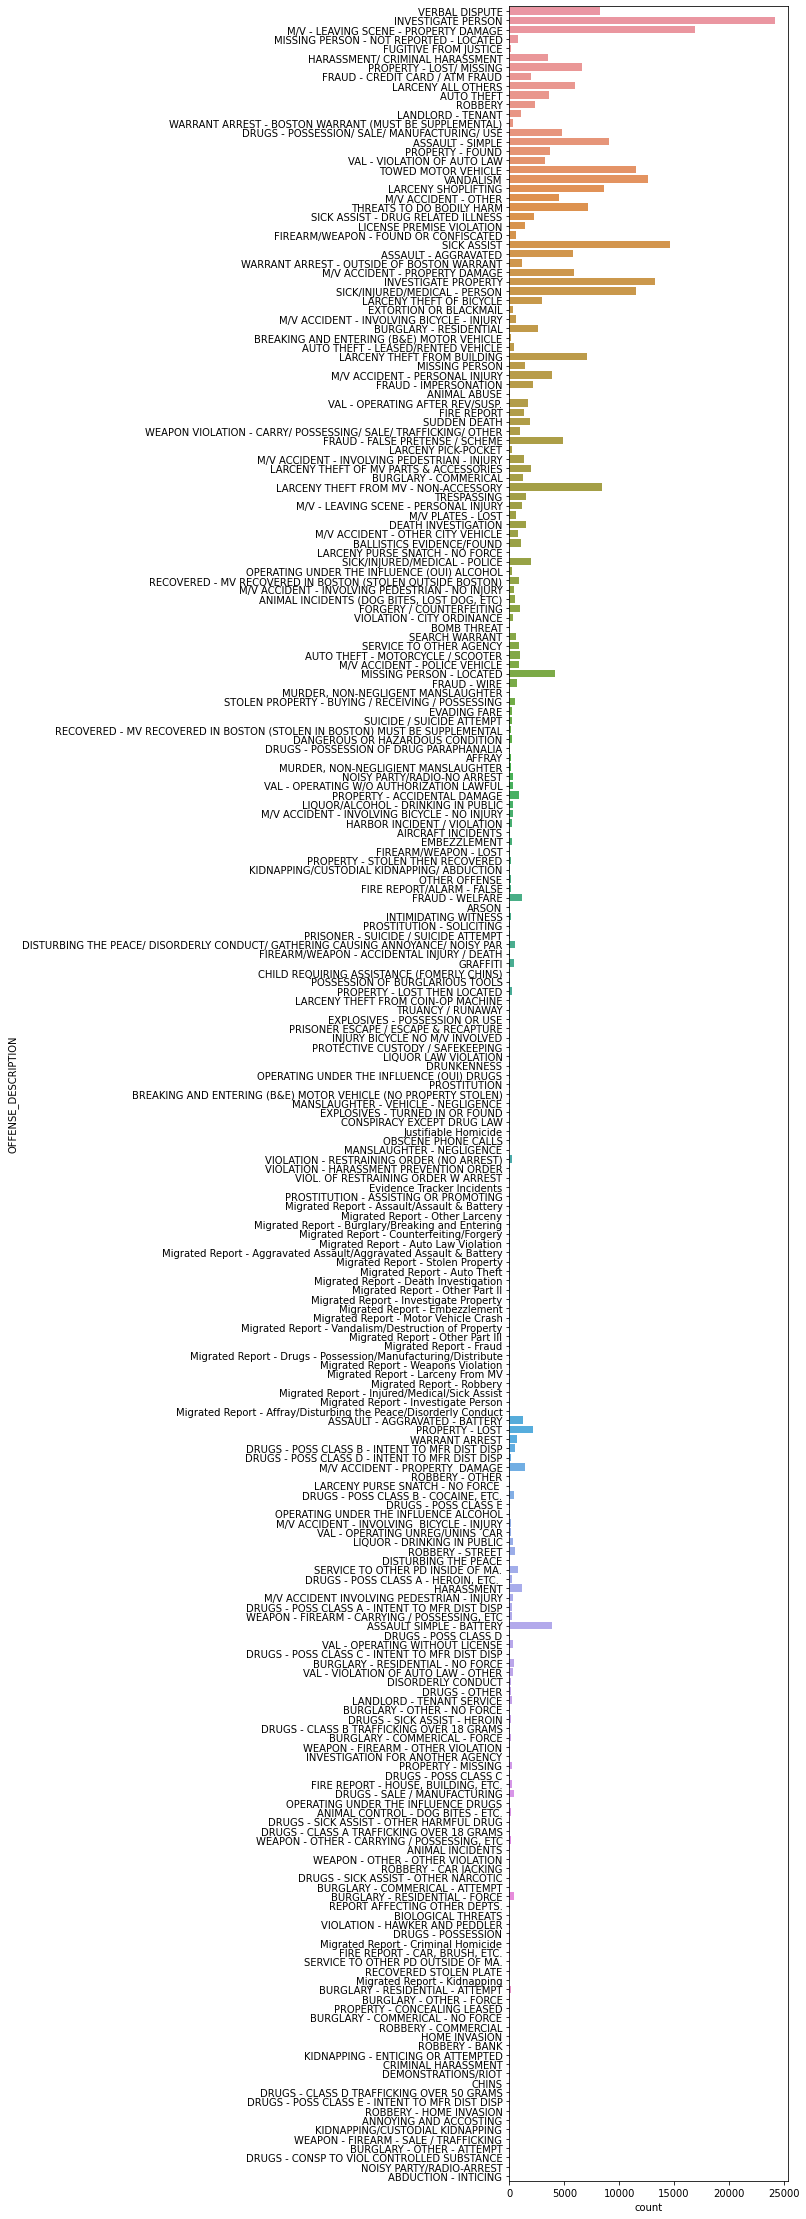

In [27]:
plt.figure(figsize=(5,40))
count = sns.countplot(
        data = crimes_new,
        y = 'OFFENSE_DESCRIPTION',
)
plt.show()

As per the graph, the Crime Code Description 'Investigating person' has been most reported in Boston in the last years. Whereas, 'wepon fire arm sale','Burgyglary','Kidnaping' are some of the least reported crimes which shows the rate of occurence of these crimes may be very low in the past years.

# Visualizing which day of the week is most violent in BOSTON
This visualization address the research question of the most violent day in a week in BOSTON

In [28]:
labels = crimes_new['DAY_OF_WEEK'].unique()
values=[]
for each in labels:
    values.append(len(crimes_new[crimes_new['DAY_OF_WEEK']==each]))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

We can see that FRIDAY is the day where there are more crimes reported with 15.3% or 113,578 cases.

# Pattern indicating rise and fall of crime rate in BOSTON

<AxesSubplot:>

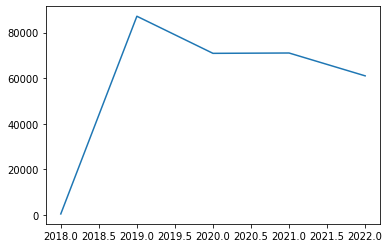

In [29]:
crimeByYear = crimes_new['YEAR'].value_counts(sort=False).sort_index()
crimeByYear.plot(kind = 'line')

As per the line graph, the crime rate peaked in the two-year period between 2018 and 2019.

# Detecting outliers with boxplot rule

In [47]:
#Calculation of first quantile
q1 = crimes_new['HOUR'].quantile(0.25)

#Calculation of third quantile
q3 = crimes_new['HOUR'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = q3 - q1

In [50]:
#Evaluating the outliers
crimes_new[crimes_new['HOUR']<q1 - 1.5*IQR]
crimes_new[crimes_new['HOUR']>q3 + 1.5*IQR]

Empty DataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_DESCRIPTION, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY_OF_WEEK, HOUR, STREET, LOCATION]
Index: []

# SUMMARY

By using Pandas, we analyzed and visualized the open data of Boston Crime Incident Reports. Turns out Pandas is indeed a very powerful Python package in terms of extracting, grouping, sorting, analyzing, and plotting the data. From bring the raw unstructured data, merging them together and brought into one dataset. Later brought with research question where the motivation of the project is build. In building the prediction model it is imprtent to visualize the data. 

The following are the outcomes from this milestone 
crime is more number of times happeing that is investigate person by this we can say that the city of boston has more number of investigate person crimes from the years 2018 to 2022 and street washington has more number of crimes the investigative crime is more that to in the street of washington st . The 9th month has the highest amount when compared the crimes with all the 12 months with around 2500 number of crimes pproxmetly. 'Investigating person' has been most reported in Boston in the last years. Whereas, 'wepon fire arm sale','Burgyglary','Kidnaping' are some of the least reported crimes which shows the rate of occurence of these crimes may be very low in the past years.